In [49]:
import numpy as np
import tensorflow as tf
import random

np.random.seed(77)
tf.random.set_seed(77)
random.seed(77)


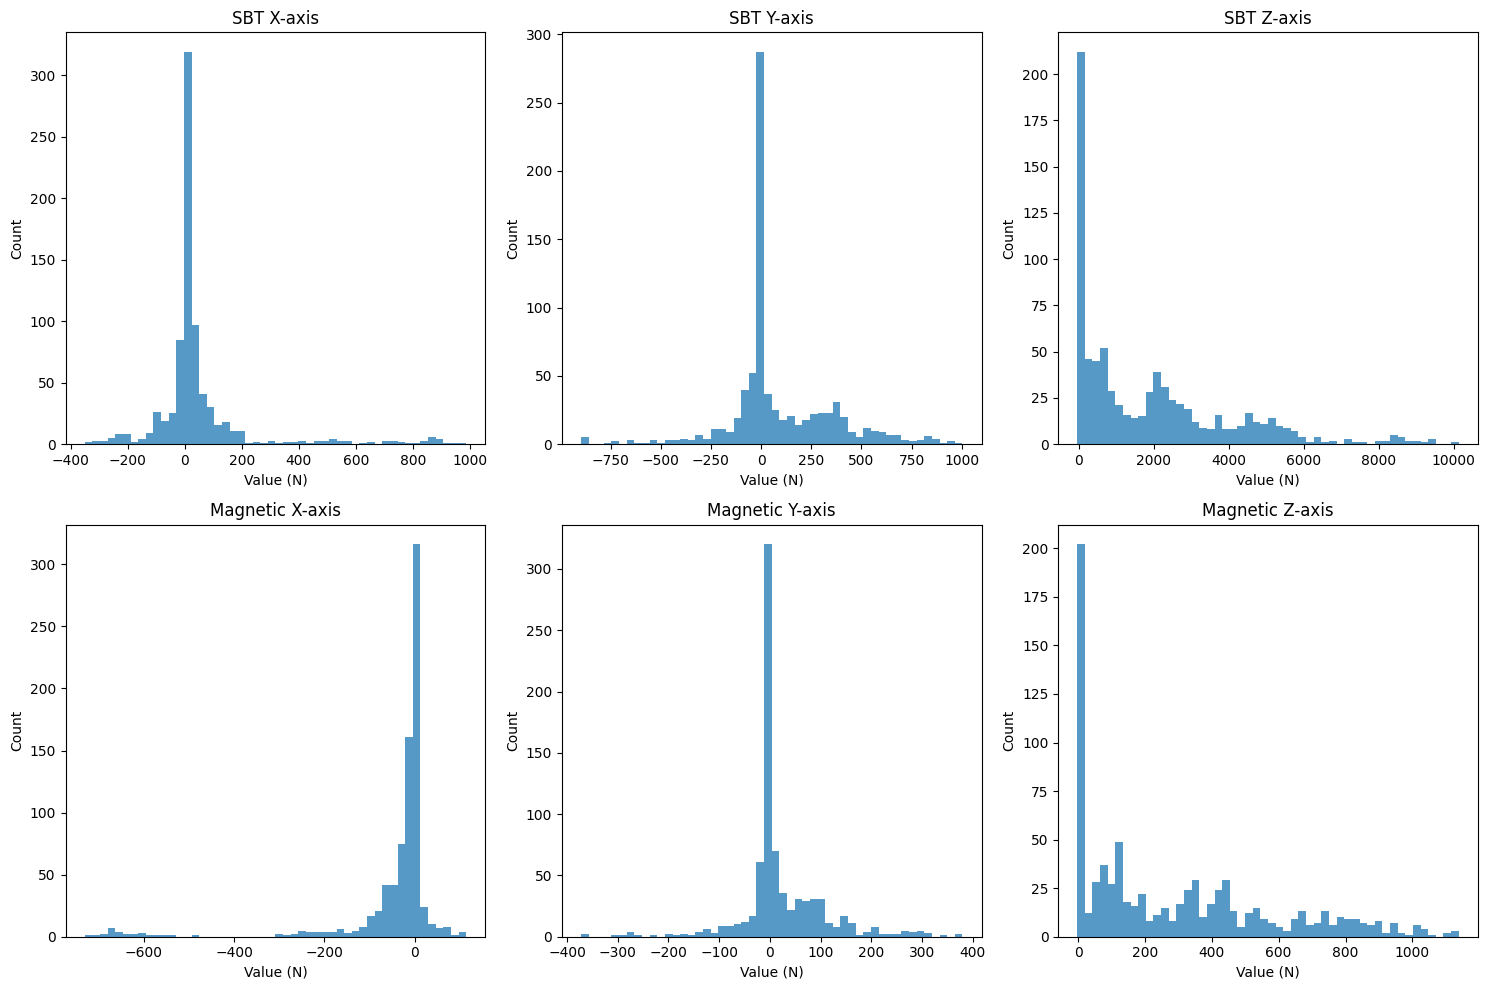

       SBT X-axis   SBT Y-axis    SBT Z-axis  Magnetic X-axis  \
count  803.000000   803.000000    803.000000       803.000000   
mean    50.691158    89.829390   1911.312578       -44.541360   
std    186.250131   268.117013   2125.145864       122.880509   
min   -351.000000  -898.000000    -42.000000      -731.417000   
25%     -3.000000   -18.000000     64.500000       -36.060000   
50%      4.000000     1.000000   1134.000000        -5.409000   
75%     45.000000   242.000000   2869.000000        -1.202000   
max    987.000000  1004.000000  10137.000000       114.190000   

       Magnetic Y-axis  Magnetic Z-axis  
count       803.000000       803.000000  
mean         22.873925       292.648824  
std          83.392990       290.944086  
min        -372.620000        -2.420000  
25%          -4.207000        19.844000  
50%           1.202000       193.600000  
75%          53.789500       453.266000  
max         379.832000      1138.367900  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


dataframe1_path = '1_merged.csv'

dataframe1 = pd.read_csv(dataframe1_path)


desc_stats = dataframe1.describe()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

columns = ['SBT X-axis', 'SBT Y-axis', 'SBT Z-axis', 'Magnetic X-axis', 'Magnetic Y-axis', 'Magnetic Z-axis']
for i, col in enumerate(columns):
    axes[i].hist(dataframe1[col], bins=50, alpha=0.75)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value (N)')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

print(desc_stats)



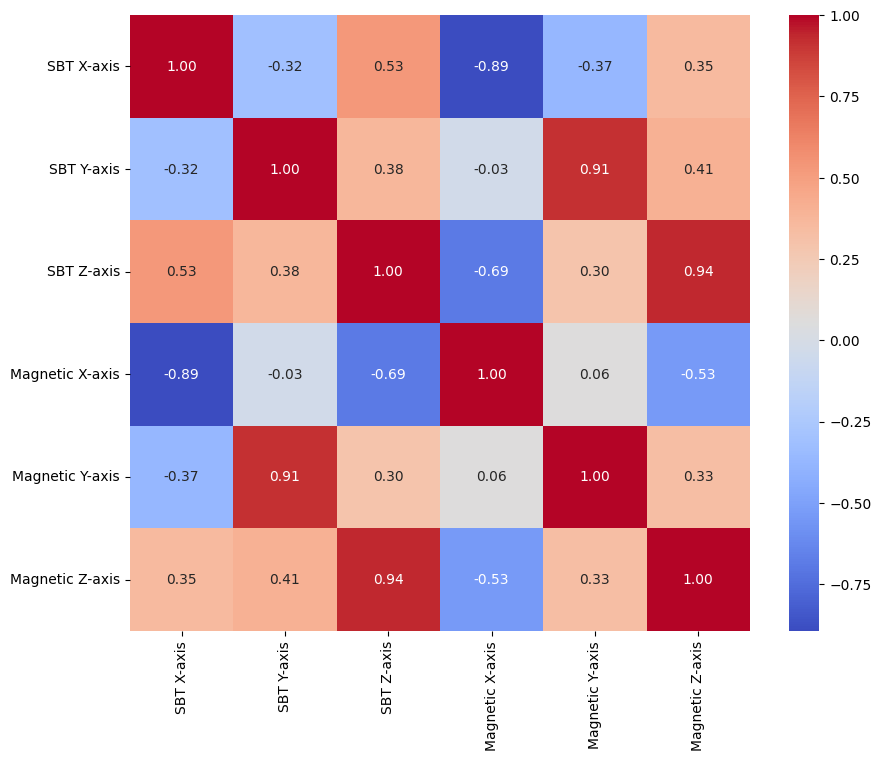

In [2]:
import seaborn as sns
#corr of dataset1
correlation_matrix = dataframe1[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [3]:


dataframe2_path = '2_merged.csv'

dataframe2 = pd.read_csv(dataframe2_path)



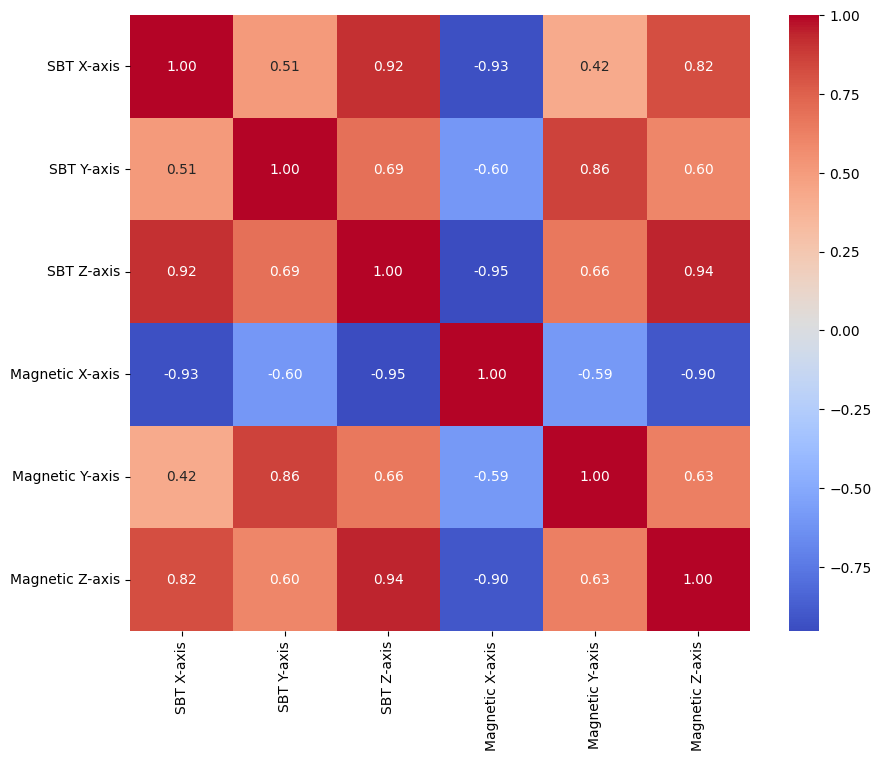

In [4]:
import seaborn as sns
#corr of dataset 2
correlation_matrix = dataframe2[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [5]:

dataframe3_path = '3_merged.csv'

dataframe3 = pd.read_csv(dataframe3_path)

desc_stats = dataframe3.describe()



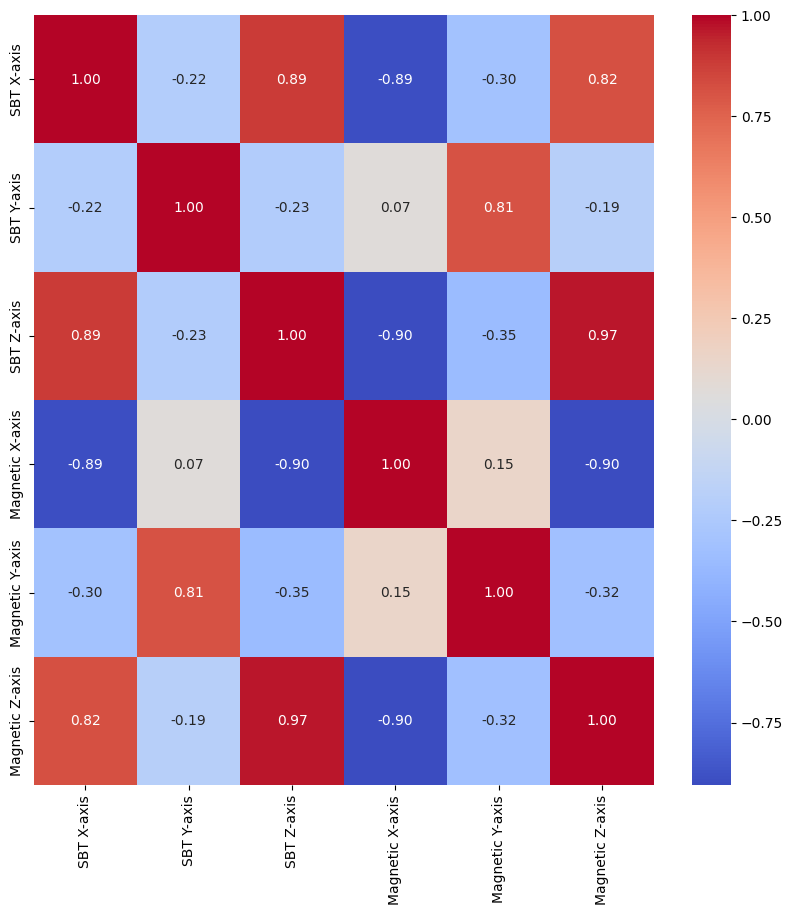

In [6]:
correlation_matrix = dataframe3[columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

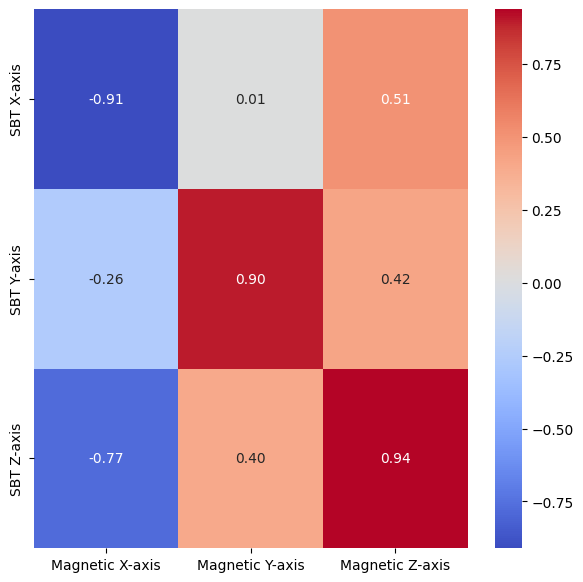

In [62]:
# Combined dataframe

merged_df = pd.concat([dataframe1,dataframe2,dataframe3])

sbt_columns = ['SBT X-axis', 'SBT Y-axis', 'SBT Z-axis']
magnetic_columns = ['Magnetic X-axis', 'Magnetic Y-axis', 'Magnetic Z-axis']

correlation_filtered = merged_df[sbt_columns + magnetic_columns].corr().loc[sbt_columns, magnetic_columns]

plt.figure(figsize=(7,7))
sns.heatmap(correlation_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


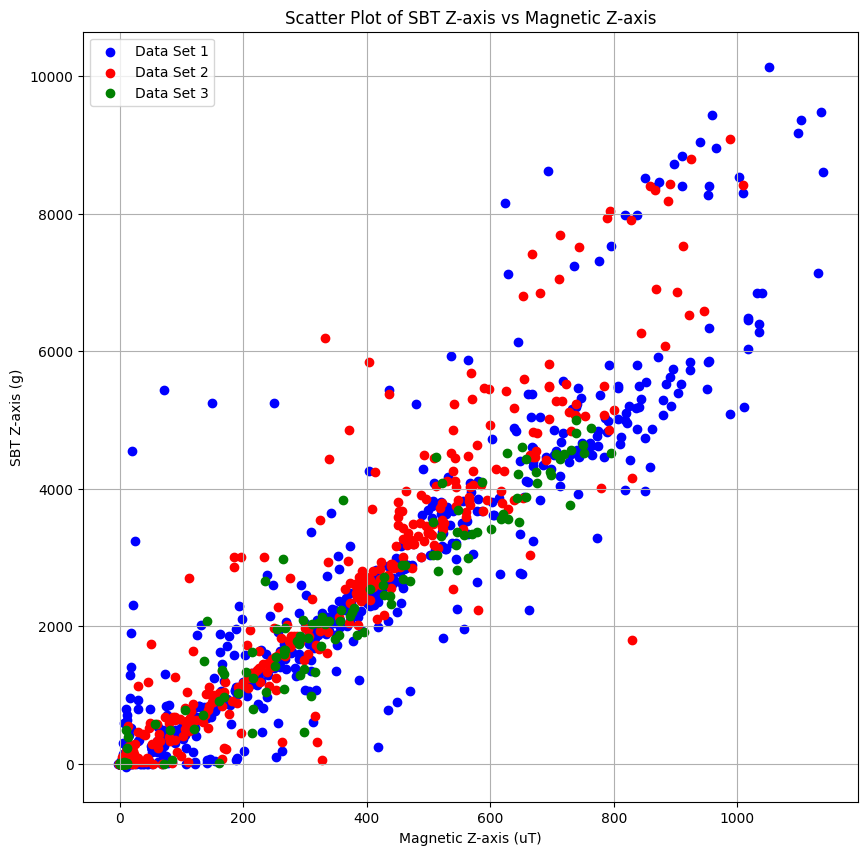

In [7]:

plt.figure(figsize=(10, 10))

plt.scatter(dataframe1['Magnetic Z-axis'], dataframe1['SBT Z-axis'], c='blue', label='Data Set 1')


plt.scatter(dataframe2['Magnetic Z-axis'], dataframe2['SBT Z-axis'], c='red', label='Data Set 2')

plt.scatter(dataframe3['Magnetic Z-axis'], dataframe3['SBT Z-axis'], c='green', label='Data Set 3')

plt.xlabel('Magnetic Z-axis (uT)')
plt.ylabel('SBT Z-axis (g)')
plt.title('Scatter Plot of SBT Z-axis vs Magnetic Z-axis')
plt.legend()
plt.grid(True)
plt.show()

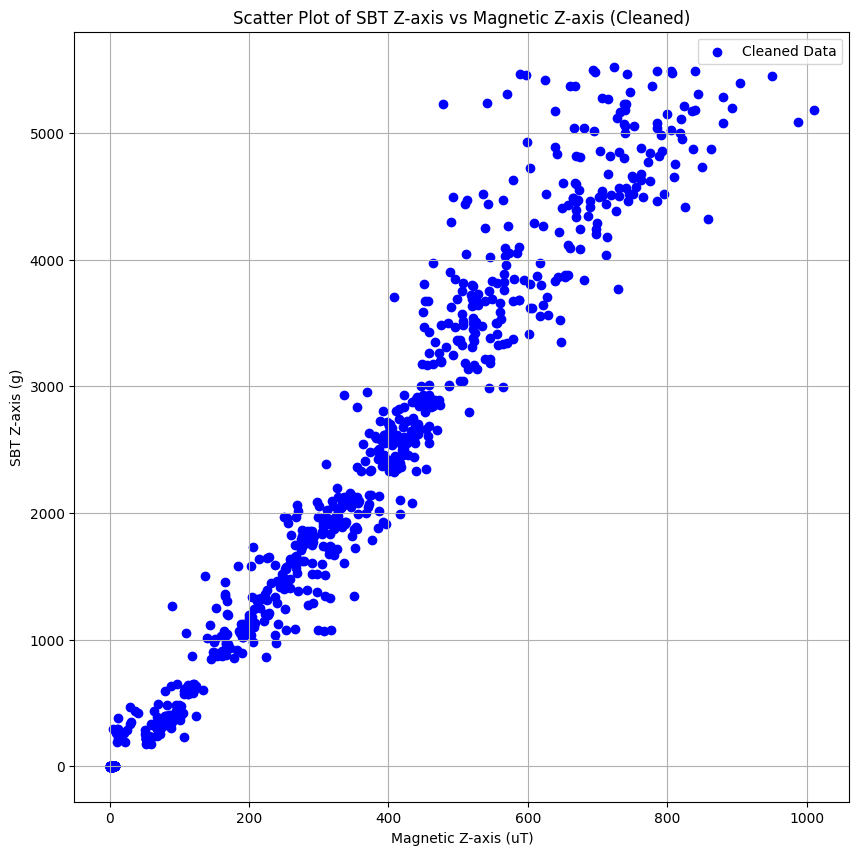

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


combined_data1 = dataframe1[['Timestamp', 'SBT Z-axis', 'Magnetic Z-axis']]
combined_data2 = dataframe2[['Timestamp', 'SBT Z-axis', 'Magnetic Z-axis']]
combined_data3 = dataframe3[['Timestamp', 'SBT Z-axis', 'Magnetic Z-axis']]


combined_data = pd.concat([combined_data1, combined_data2,combined_data3])

data = combined_data[['SBT Z-axis', 'Magnetic Z-axis']]


lof = LocalOutlierFactor(n_neighbors=50, contamination=0.35)


combined_data['anomaly'] = lof.fit_predict(data)

cleaned_data = combined_data[combined_data['anomaly'] == 1]

# Plot Scatter
plt.figure(figsize=(10, 10))
plt.scatter(cleaned_data['Magnetic Z-axis'], cleaned_data['SBT Z-axis'], c='blue', label='Cleaned Data')
plt.xlabel('Magnetic Z-axis (uT)')
plt.ylabel('SBT Z-axis (g)')
plt.title('Scatter Plot of SBT Z-axis vs Magnetic Z-axis (Cleaned)')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
num_combined_data = combined_data.shape[0]

num_cleaned_data = cleaned_data.shape[0]

print(f'Number of rows in combined_data: {num_combined_data}')
print(f'Number of rows in cleaned_data: {num_cleaned_data}')

Number of rows in combined_data: 1389
Number of rows in cleaned_data: 903


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = cleaned_data[['Magnetic Z-axis']].values 
y = cleaned_data['SBT Z-axis'].values  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)


In [80]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import joblib


l_model = LinearRegression()
l_model.fit(X_train, y_train)

y_train_pred = l_model.predict(X_train)
y_pred = l_model.predict(X_test)

joblib.dump(l_model, 'linear_regression_model.pkl')
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"Mean Absolute Error (MAE): {mae_train}")


['linear_regression_model.pkl']

Mean Squared Error: 134770.7558375475
Mean Absolute Error: 222.33801022026933
R^2 Score: 0.947897444082173


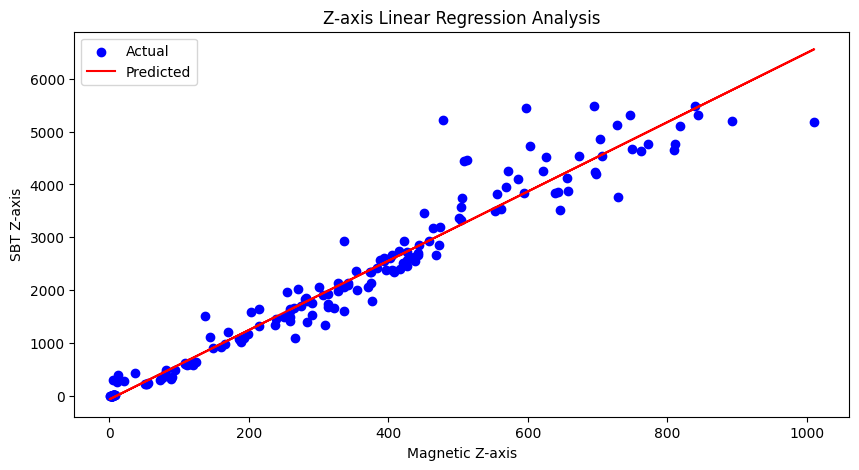

In [12]:
y_pred = l_model.predict(X_test)

# Evaluate Linear model
L_mse = mean_squared_error(y_test, y_pred)
L_mae = mean_absolute_error(y_test, y_pred)
L_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {L_mse}")
print(f"Mean Absolute Error: {L_mae}")
print(f"R^2 Score: {L_r2}")

# Visualisation
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Z-axis Linear Regression Analysis')
plt.xlabel('Magnetic Z-axis')
plt.ylabel('SBT Z-axis')
plt.legend()
plt.show()

In [55]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

def build_model():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_dim=1))  
    for _ in range(4): 
        model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  
    return model

model = build_model()
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_absolute_error')


reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, verbose=1)

checkpoint = ModelCheckpoint('Z_best_model.h5', monitor='loss', save_best_only=True, verbose=1)

early_stopping = EarlyStopping(monitor='loss', min_delta=0.001, patience=10, verbose=1, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=500, callbacks=[reduce_lr, checkpoint, early_stopping])



Epoch 1/500
16/23 [===================>..........] - ETA: 0s - loss: 2080.4851  
Epoch 1: loss improved from inf to 2057.50195, saving model to Z_best_model.h5
23/23 [==============================] - 3s 7ms/step - loss: 2057.5020 - lr: 0.0010
Epoch 2/500
18/23 [======================>.......] - ETA: 0s - loss: 1999.4727
Epoch 2: loss improved from 2057.50195 to 2029.53882, saving model to Z_best_model.h5
23/23 [==============================] - 0s 11ms/step - loss: 2029.5388 - lr: 0.0010
Epoch 3/500
20/23 [=========================>....] - ETA: 0s - loss: 1981.2943
Epoch 3: loss improved from 2029.53882 to 1945.51624, saving model to Z_best_model.h5
23/23 [==============================] - 0s 8ms/step - loss: 1945.5162 - lr: 0.0010
Epoch 4/500
16/23 [===================>..........] - ETA: 0s - loss: 1762.0613
Epoch 4: loss improved from 1945.51624 to 1684.52454, saving model to Z_best_model.h5
23/23 [==============================] - 0s 13ms/step - loss: 1684.5245 - lr: 0.0010
Epoch 5

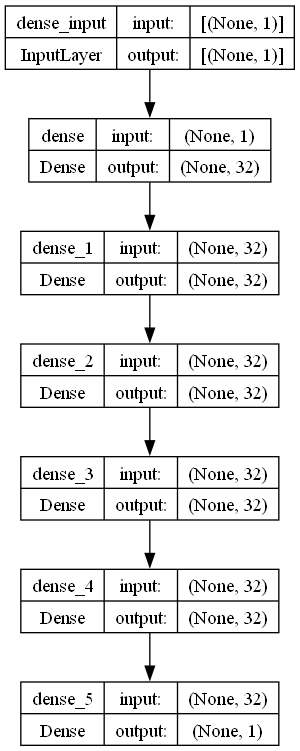

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp_model.png', show_shapes=True, show_layer_names=True)

In [52]:
from keras.models import load_model

best_model = load_model('Z_best_model.h5')
predictions = best_model.predict(X_test)



6/6 [==============================] - 0s 3ms/step


Mean Squared Error (MSE): 138188.72168948405
Mean Absolute Error (MAE): 218.15538490740633
R^2 Score: 0.9465760538753807


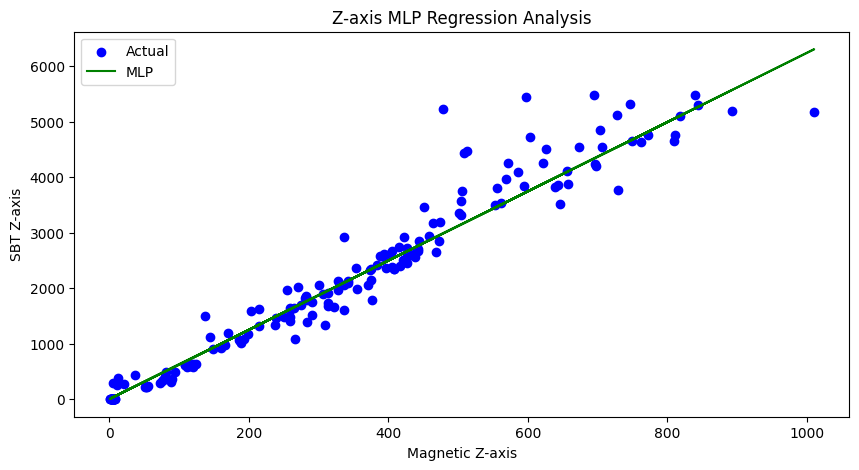

In [53]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print(f"R^2 Score: {r2}")


plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='green', label='MLP')
plt.title('Z-axis MLP Regression Analysis')
plt.xlabel('Magnetic Z-axis')
plt.ylabel('SBT Z-axis')
plt.legend()
plt.show()

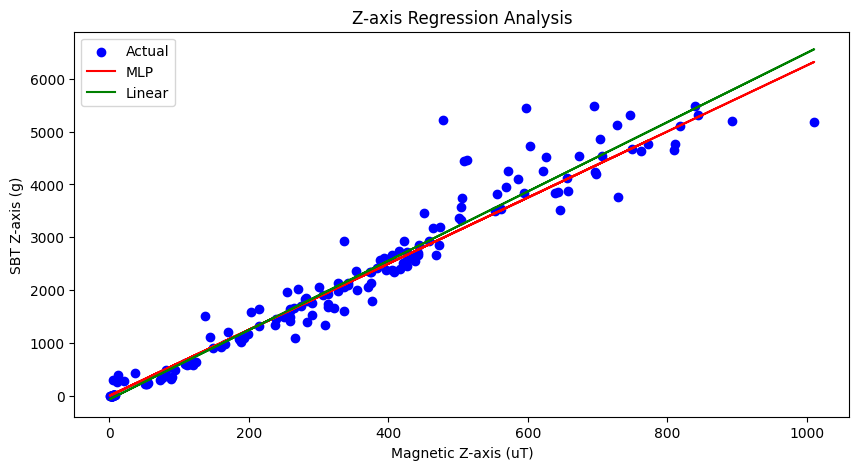

In [18]:

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', label='MLP')
plt.plot(X_test, y_pred, color='green', label='Linear')
plt.title('Z-axis Regression Analysis')
plt.xlabel('Magnetic Z-axis (uT)')
plt.ylabel('SBT Z-axis (g)')
plt.legend()
plt.show()